# Fill missing values using spline interpolation

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pmdarima as pm
from pmdarima import arima
from pmdarima import model_selection
from pmdarima import pipeline
from pmdarima import preprocessing
from pmdarima.datasets._base import load_date_example

In [30]:
data = pd.read_csv('../Data/Sample - Superstore.csv', parse_dates=['Order Date','Ship Date'], encoding='ISO-8859-1')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [32]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Obtain Daily Sales

In [33]:
data.groupby('Order Date')['Sales'].sum()

Order Date
2014-01-03      16.4480
2014-01-04     288.0600
2014-01-05      19.5360
2014-01-06    4407.1000
2014-01-07      87.1580
                ...    
2017-12-26     814.5940
2017-12-27     177.6360
2017-12-28    1657.3508
2017-12-29    2915.5340
2017-12-30     713.7900
Name: Sales, Length: 1237, dtype: float64

In [34]:
daily_sales = pd.DataFrame(data.resample('D', on='Order Date')['Sales'].sum())

In [35]:
daily_sales['Sales']

Order Date
2014-01-03      16.4480
2014-01-04     288.0600
2014-01-05      19.5360
2014-01-06    4407.1000
2014-01-07      87.1580
                ...    
2017-12-26     814.5940
2017-12-27     177.6360
2017-12-28    1657.3508
2017-12-29    2915.5340
2017-12-30     713.7900
Freq: D, Name: Sales, Length: 1458, dtype: float64

In [36]:
import numpy as np
daily_sales['Sales'] = daily_sales['Sales'].replace(0,np.nan)
daily_sales

,Sales
Order Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
...,...
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508


In [37]:
daily_sales['Sales'].isna().sum()

221

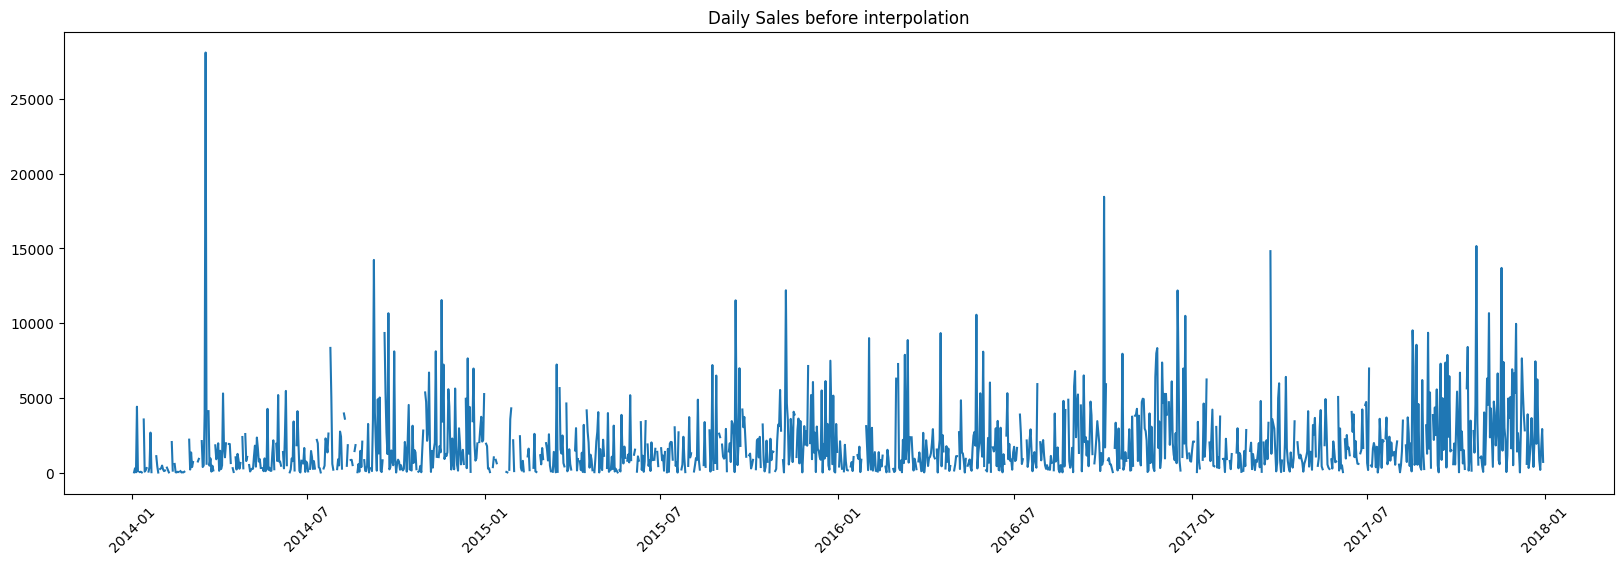

In [ ]:
#show daily sales
plt.figure(figsize=(20,6))
plt.plot(daily_sales['Sales'])
plt.xticks(rotation=45)
plt.title('Daily Sales before interpolation')
plt.show()

In [39]:
daily_sales['Sales_inputed'] = daily_sales['Sales'].interpolate(method='spline', order=1)

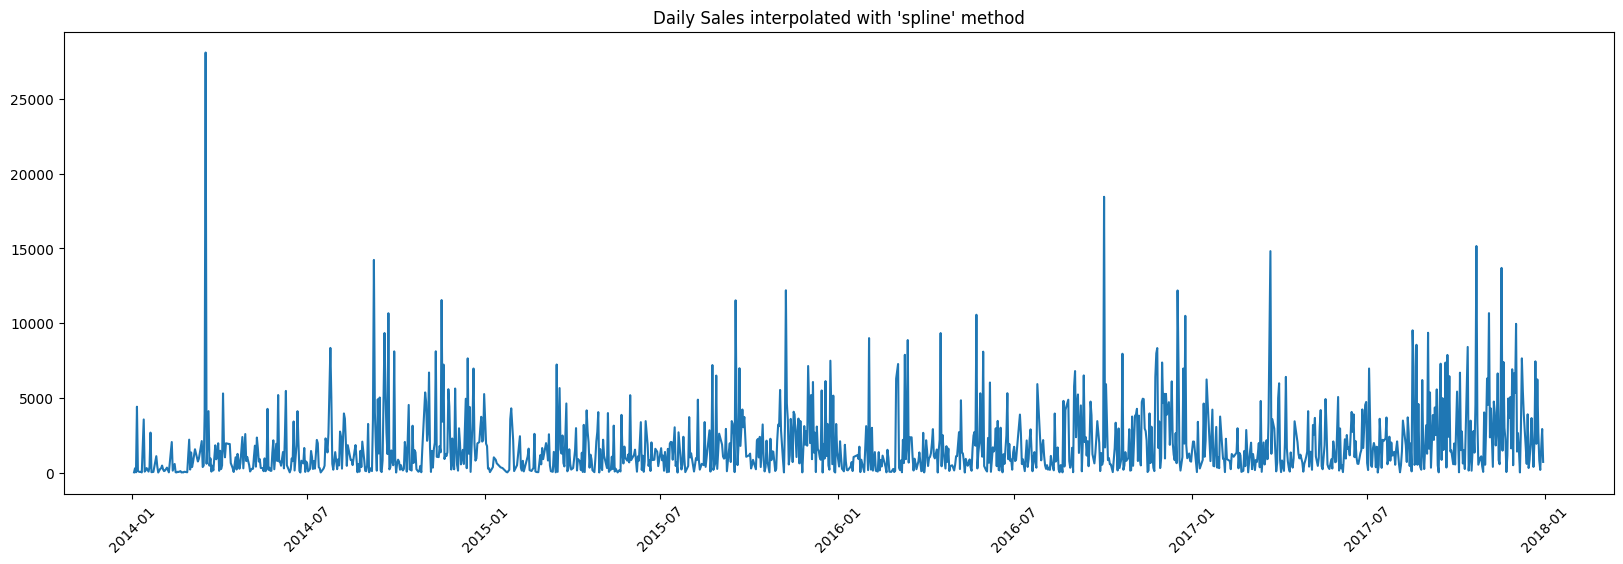

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(daily_sales['Sales_inputed'])
plt.xticks(rotation=45)
plt.title("Daily Sales interpolated with 'spline' method")
plt.show()

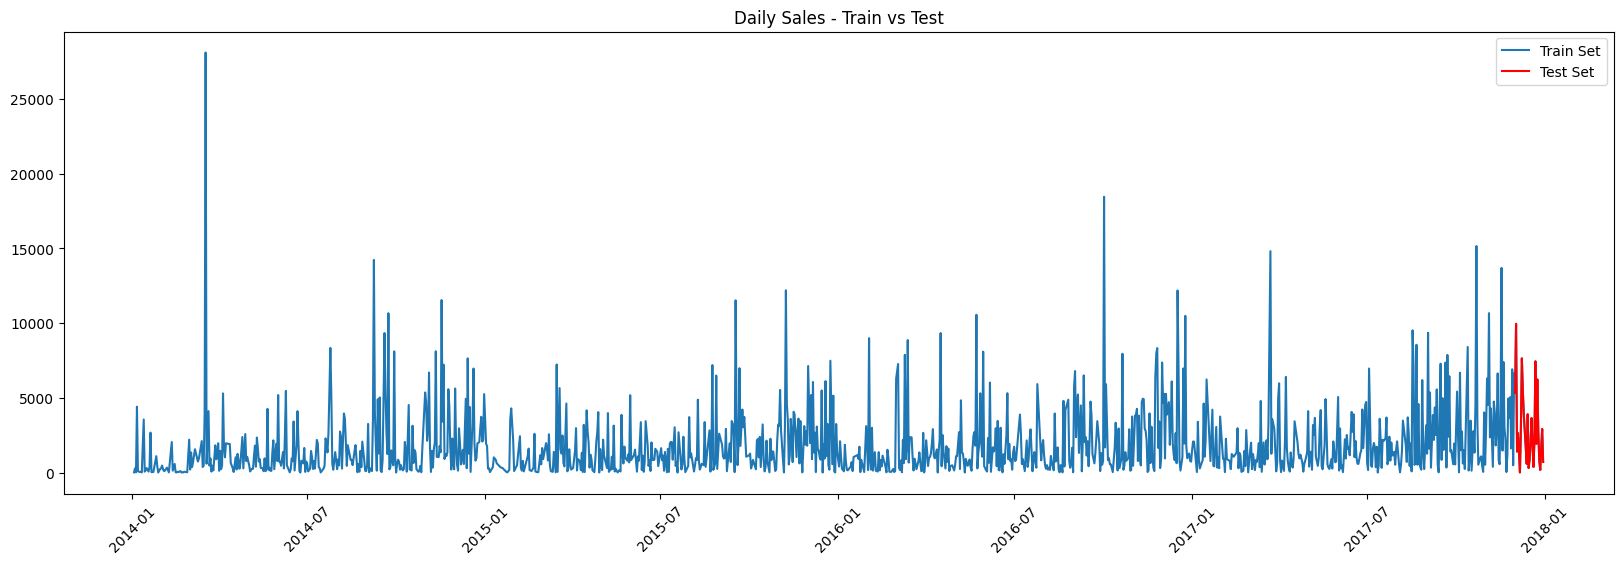

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot(daily_sales['Sales_inputed'], label='Train Set')

plt.plot(daily_sales['Sales_inputed'].loc['2017-12':], color='red', label='Test Set')

plt.xticks(rotation=45)
plt.title('Daily Sales - Train vs Test')
plt.legend()
plt.show()


In [94]:
daily_sales['isinterpolate'] = 0

In [97]:
daily_sales['isinterpolate'] = 0
daily_sales.loc[daily_sales['Sales'].isna(), 'isinterpolate'] = 1

In [98]:
daily_sales['isinterpolate'].value_counts()

isinterpolate
0    1237
1     221
Name: count, dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller


def check_stationarity(df, column):
    # ADF test
    result = adfuller(df[column])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
    return result[1] < 0.05

In [ ]:
result = adfuller(daily_sales['Sales_inputed'])
result

(-6.4211546080443105,
 1.790195349272193e-08,
 15,
 1442,
 {'1%': -3.4348929812602784,
  '5%': -2.863546418485167,
  '10%': -2.5678382024888378},
 26034.556135698724)

In [102]:
check_stationarity(daily_sales, 'Sales_inputed')

ADF Statistic: -6.4211546080443105
p-value: 1.790195349272193e-08


True

In [ ]:
def create_circular_lag_features(df, column='Sales', lag_periods=[1, 7, 30]):
    """
    Create circular lag features to avoid initial missing values
    """
    df_features = df.copy()
    n = len(df_features)
    
    for lag in lag_periods:
        feature_name = f'{column}_lag_{lag}'
        # Create normal lag features
        df_features[feature_name] = df_features[column].shift(lag)
        
        # Fill initial missing values with data from the end
        df_features.loc[df_features.index[:lag], feature_name] = df_features[column].iloc[-(lag):].values
    
    return df_features

def create_circular_rolling_mean(df, column='Sales', windows=[7, 30]):
    """
    Calculate initial rolling average using circular data
    """
    df_features = df.copy()
    
    for window in windows:
        feature_name = f'{column}_rolling_mean_{window}'
        
        # Calculate normal rolling average
        df_features[feature_name] = df_features[column].rolling(window=window).mean()
        
        # Handle initial missing values
        for i in range(window-1):
            # Concatenate end data to beginning to calculate initial values
            temp_series = pd.concat([
                df_features[column].iloc[-(window-1-i):],
                df_features[column].iloc[:i+1]
            ])
            df_features.loc[df_features.index[i], feature_name] = temp_series.mean()
            
    return df_features


def create_circular_rolling_std(df, column='Sales', windows=[7, 30]):
    """
    Calculate initial rolling standard deviation using circular data
    """
    df_features = df.copy()
    
    for window in windows:
        feature_name = f'{column}_rolling_mean_{window}'
        
        # Calculate normal rolling standard deviation
        df_features[feature_name] = df_features[column].rolling(window=window).std()
        
        # Handle initial missing values
        for i in range(window-1):
            # Concatenate end data to beginning to calculate initial values
            temp_series = pd.concat([
                df_features[column].iloc[-(window-1-i):],
                df_features[column].iloc[:i+1]
            ])
            df_features.loc[df_features.index[i], feature_name] = temp_series.std()
            
    return df_features

# 3. Feature Engineering
def create_time_features(df,column='Sales'):
    # Extract time features
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['weekday'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['is_weekend'] = df.index.dayofweek.isin([5, 6]).astype(int)


    # Add lag features
    df = create_circular_lag_features(df, column=column, lag_periods=[1, 7, 30])

    # Add rolling statistical features
    df = create_circular_rolling_mean(df, column=column, windows=[7, 30])
    df = create_circular_rolling_std(df, column=column, windows=[7, 30])

        # 2. Exponential moving average
    df['rolling_ema_7'] = df['Sales'].ewm(span=7).mean()
    df['rolling_ema_30'] = df['Sales'].ewm(span=30).mean()

    
    return df

In [108]:
daily_sales = create_time_features(daily_sales, column='Sales_inputed')

In [109]:
daily_sales.head(20)

,Sales,Sales_inputed,isinterpolate,year,month,weekday,quarter,is_weekend,Sales_inputed_lag_1,Sales_inputed_lag_7,Sales_inputed_lag_30,Sales_inputed_rolling_mean_7,Sales_inputed_rolling_mean_30,rolling_ema_7,rolling_ema_30
Order Date,,,,,,,,,,,,,,,
2014-01-03,16.448,16.448000,0,2014,1,4,1,0,713.790000,6233.054000,5331.178000,1167.584230,2478.029374,16.448000,16.448000
2014-01-04,288.060,288.060000,0,2014,1,5,1,1,16.448000,2698.927000,9951.182000,1028.218172,2098.433168,171.654857,156.780867
2014-01-05,19.536,19.536000,0,2014,1,6,1,1,288.060000,814.594000,1403.842000,1086.691903,2134.900378,105.873730,107.949946
2014-01-06,4407.100,4407.100000,0,2014,1,0,1,0,19.536000,177.636000,2639.638000,1679.590079,2168.557241,1678.893623,1292.522451
2014-01-07,87.158,87.158000,0,2014,1,1,1,0,4407.100000,1657.350800,1453.136000,1747.806526,2202.430323,1157.146735,1018.272855
2014-01-08,NaN,64.002075,1,2014,1,2,1,0,87.158000,2915.534000,10.680000,1610.051625,2200.523886,1157.146735,1018.272855
2014-01-09,40.544,40.544000,0,2014,1,3,1,0,64.002075,713.790000,2916.514000,1635.921549,2236.036712,746.036191,816.526043
2014-01-10,54.830,54.830000,0,2014,1,4,1,0,40.544000,16.448000,7643.041000,1633.298088,2020.842492,518.444756,678.878027
2014-01-11,9.940,9.940000,0,2014,1,5,1,1,54.830000,288.060000,5470.390000,1648.548832,1939.138815,363.308113,570.576762


In [110]:
daily_sales.isna().sum()

Sales                            221
Sales_inputed                      0
isinterpolate                      0
year                               0
month                              0
weekday                            0
quarter                            0
is_weekend                         0
Sales_inputed_lag_1                0
Sales_inputed_lag_7                0
Sales_inputed_lag_30               0
Sales_inputed_rolling_mean_7       0
Sales_inputed_rolling_mean_30      0
rolling_ema_7                      0
rolling_ema_30                     0
dtype: int64

# save data to local

In [111]:
daily_sales.to_pickle('../Data/spline_inputed_daily_sales_FE.pkl')